# 第3章 神经网络

## 3.1 从感知机到神经网络

### 3.1.1 神经网络的例子

输入层  输出层  中间层

### 3.1.2 复习感知机

$$
y = 
\begin{cases}
    0 & (b + w_1x_1 + w_2x_2 \le 0 )\\
    1 & (b + w_1x_1 + w_2x_2 \gt 0 )\\
\end{cases}
\qquad \qquad (3.1)
$$
b是被称为偏置的参数，用于控制神经元被激活的容易程度。

而w_1和w_2是表示各个信号的权重的参数，用于控制各个信号的重要性。

$$
 y= h(b + w_1x_1 + w_2x_2) \qquad \qquad  (3.2)\\
 
 h(x) = 
\begin{cases}
0 & (x \le 0) \\
1 & (x \gt 0)
 \end{cases}

\qquad \qquad \quad (3.3)

$$

### 3.1.3 激活函数登场

$$

a = b + w_1x_1 + w_2x_2 \qquad \qquad (3.4)\\
y = h(a) \qquad \qquad \qquad \qquad \quad (3.5)

$$

h表示激活函数。

## 3.2 激活函数

### 3.2.1 sigmoid 函数 

$$

h(x) = \frac{1}{1+e^{-x}}  \qquad \qquad (3.6)

$$


### 3.2.2 阶跃函数的实现

In [2]:
import numpy as np
def step_function_simple(x):
    if x > 0:
        return 1
    else:
        return 0

def step_function(x):
    y = x > 0
    return y.astype(np.int8)

x = np.array([-1.0, 1.0, 2.0])
print(x)
y = x > 0
print(y)
y = y.astype(np.int8)
print(y)

[-1.  1.  2.]
[False  True  True]
[0 1 1]


### 3.2.3 跃阶函数的图形

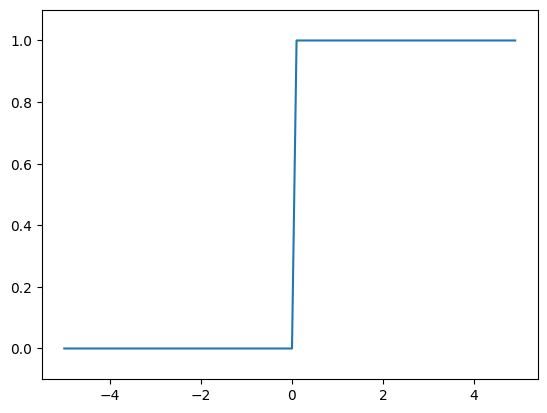

In [3]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int8)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

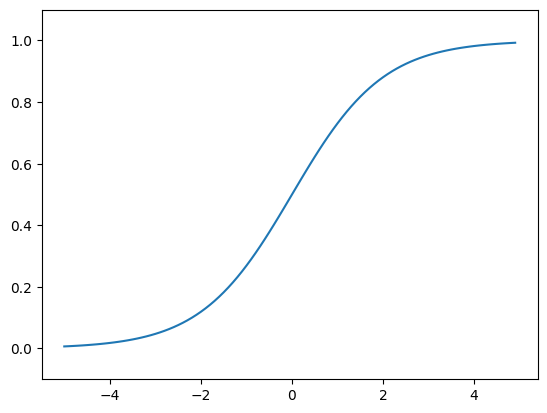

In [4]:
import numpy as np
import matplotlib.pylab as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # 指定y轴的范围
plt.show()

### 3.2.5 sigmoid函数和阶跃函数的比较

* sigmoid函数的平滑性对神经网络的学习具有重要意义
* 感知机中神经元之间流动的是0或1的二元信号，神经网络中流动的连续的实数值信号。
* 形状相似，取值范围一致。
* 两者都属于非线性函数。

### 3.2.6 非线性函数

神经网络的激活函数必须使用非线性函数。因为多个线性函数的组合总能使用一个线性函数来表示，加深曾经网络依然可以用另一个一层神经网络来表示，加深的意义就不存在了。

$$ 设h(x) = cx, y(x)=h(h(h(x))) = c^3x, 若 a =c^3 则 y(x) = ax. $$

为了发挥叠加层所带来的优势，激活函数必须使用非线性函数。

### 3.2.7 ReLU函数

在神经网络发展的历史上，sigmoid函数早就开始使用了，而最近则主要使用ReLU(Rectified Liner Unit)函数。
$$
h(x) = 
\begin{cases}
x & (x \gt 0) \\
0 & (x \le 0)
\end{cases}
\qquad \qquad \qquad (3.7) 
$$

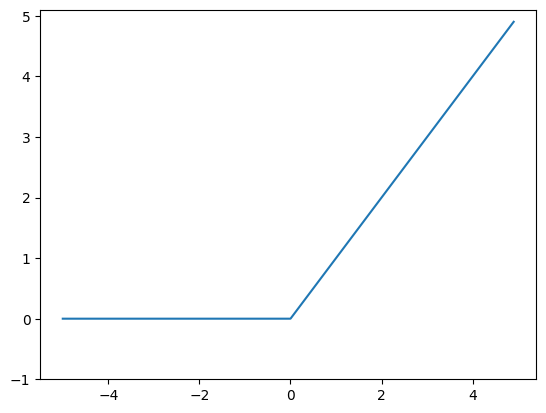

In [5]:
import numpy as np
import matplotlib.pylab as plt

def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1, 5.1) # 指定y轴的范围
plt.show()

## 3.3 多维数组的运算

### 3.3.1 多维数组

In [6]:
import numpy as np
A = np.array([1,2,3,4])
print(A)
print(np.ndim(A))
print(A.shape)
print(A.shape[0])

print('_____________________')

B = np.array([[1,2],[3,4],[5,6]])
print(B)
print(np.ndim(B))
print(B.shape)

[1 2 3 4]
1
(4,)
4
_____________________
[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


### 3.3.2 矩阵乘法

In [7]:
import numpy as np

print('======= 2x2 dot 2x2 = 2x2 =======')
A = np.array([[1,2],[3,4]])
print(A.shape)
B = np.array([[5,6],[7,8]])
print(B.shape)
print(np.dot(A,B))

print('====== 2x3 dot 3x2 = 2x2 =======')

C = np.array([[1,2,3],[4,5,6]])
print(C.shape)
D = np.array([[1,2],[3,4],[5,6]])
print(D.shape)
print(np.dot(C,D))

print('====== 3x2 dot 2x1 = 3x1 ======') 

E = np.array([[1,2],[3,4],[5,6]])
print(E.shape)
F = np.array([7,8])
print(F.shape)
print(np.dot(E,F))

======= 2x2 dot 2x2 = 2x2 =======
(2, 2)
(2, 2)
[[19 22]
 [43 50]]
====== 2x3 dot 3x2 = 2x2 =======
(2, 3)
(3, 2)
[[22 28]
 [49 64]]
====== 3x2 dot 2x1 = 3x1 ======
(3, 2)
(2,)
[23 53 83]


### 3.3.3 神经网络的内积

In [8]:
import numpy as np

X = np.array([1,2])
print(X.shape)

W = np.array([[1,3,5],[2,4,6]])
print(W.shape)

Y = np.dot(X,W)
print(Y)
print(Y.shape)

(2,)
(2, 3)
[ 5 11 17]
(3,)


## 3.4 3层神经网络的实现

$$
a_1^{(1)} = w_{11}^{(1)}x_1 + w_{12}^{(1)}x_2+b_1^{(1)} \qquad \qquad (3.8) 
$$

$$
    \mathbf{A}^{(1)} = \mathbf{X} \mathbf{W}^{(1)} + \mathbf{B}^{(1)} \qquad \qquad \qquad \quad (3.9)
$$

In [13]:
import numpy as np

X = np.array([1.0,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X,W1) + B1

print(A1)

Z1 = sigmoid(A1)
print(Z1)

print("\n\n===== translate from 1 to 2 ====")

W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])
print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1,W2) + B2
print(A2)
Z2 = sigmoid(A2)
print(Z2)

print("\n\n===== translate from 2 to 3 ====")

def identify_function(x):
    return x

W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(Z2,W3) + B3
Y = identify_function(A3)
print(Y)



(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


===== translate from 1 to 2 ====
(3,)
(3, 2)
(2,)
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


===== translate from 2 to 3 ====
[0.31682708 0.69627909]
